# Evolutionary multiobjective optimization

LEAP currently directly supports one form of multiobjective optimization, NSGA-II, but there is intent to implement other common evolutionary multiobjective algorithms.

## Naive evolutionary multiobjective optimization

A naive approach to evolutionary multiobjective optimization would be to simply sum up the fitnesses, biased by a weight, as a final, single fitness, $f(x)$:

$f(x) = \sum \limits_{i=0}^n w_i f_i$

Where $f_i$ is the fitness for objective _i_.

However, there isn't very satisfying because we have to decide on $w_i$, which we usually don't know. A better approach would be to evolve solutions along a Pareto front where each solution on the front dominates other solutions.

## NSGA-II

The NSGA-II algorithm is just one such evolutionary multiobjective optimization (MO) algorithm.

Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan.
"A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II." IEEE
transactions on evolutionary computation 6, no. 2 (2002): 182-197.


In [1]:
import os, sys
from matplotlib import pyplot as plt
import pandas as pd

from leap_ec import test_env_var
from leap_ec.representation import Representation
from leap_ec.ops import tournament_selection, clone, evaluate, pool
from leap_ec.real_rep.initializers import create_real_vector
from leap_ec.real_rep.ops import mutate_gaussian
from leap_ec.probe import print_individual
from leap_ec.multiobjective.probe import ParetoPlotProbe2D
from leap_ec.global_vars import context

from leap_ec.multiobjective.nsga2 import generalized_nsga_2
from leap_ec.multiobjective.problems import SCHProblem

In [2]:
# These are smaller than the values used in original paper, but suffice for demonstration purposes.
POP_SIZE=50
MAX_GENERATIONS=100

# When running this notebook in test harness mode, just run for two generations
if os.environ.get(test_env_var, False) == 'True':
    MAX_GENERATIONS = 2

We supply one of the benchmark functions, Schaffer's Study (that we refer to as the "SCHProblem"), used in Deb's original paper that uses a single gene from which we calculate two separate fitnesses.

$f_1(x) = x^2$

$f_2(x) = (x - 2)^2$

For which there are two optimal solutinos, $x \in [0,2]$

In [3]:
sch_problem = SCHProblem() # Schaffer's Study problem

In [4]:
# We're only going to do a narrow range, which is sufficient for demonstration purposes. The original
# NSGA-II paper explored a wider range.
sch_representation = Representation(initialize=create_real_vector(bounds=[(-10, 10)]))

In [5]:
def print_generation(population):
    """ Pipeline probe for echoing current generation """
    if context['leap']['generation'] % 10 == 0:
        print(f"generation: {context['leap']['generation']}")
    return population

<IPython.core.display.Javascript object>


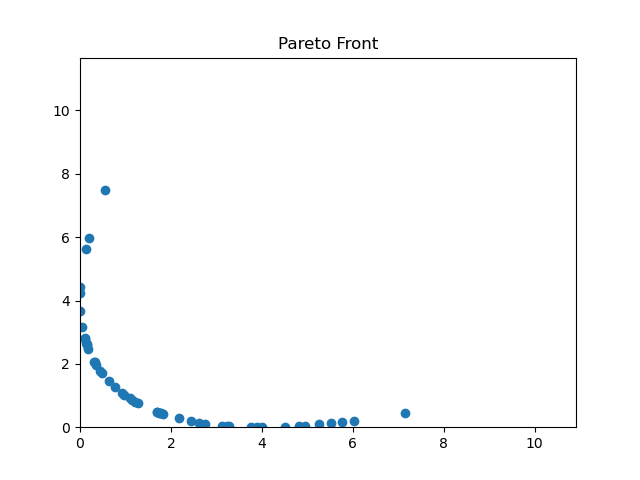

In [6]:
%matplotlib notebook
plt.figure()

viz_probe = ParetoPlotProbe2D(ax=plt.gca(), xlim=(0, 10), ylim=(0, 10))

In [7]:
pipeline = [tournament_selection, # uses domination comparison in MultiObjective.worse_than()
            clone,
            mutate_gaussian(std=0.5, expected_num_mutations=1),
            evaluate,
#             print_individual, # only if you want to see every single new offspring
            pool(size=POP_SIZE),
            viz_probe,
            print_generation]

In [8]:
final_pop = generalized_nsga_2(max_generations=MAX_GENERATIONS,
                   pop_size=POP_SIZE,
                   problem=sch_problem,
                   representation=sch_representation,
                   pipeline=pipeline)

generation: 0
generation: 10
generation: 20
generation: 30
generation: 40
generation: 50
generation: 60
generation: 70
generation: 80
generation: 90


In [9]:
df = pd.DataFrame([(x.genome[0], x.fitness[0], x.fitness[1], x.rank, x.distance) for x in final_pop])

In [10]:
df.columns = ['gene','f1','f2','rank','distance']

In [11]:
df

,gene,f1,f2,rank,distance
0,-0.000268,7.194701e-08,4.001073e+00,1,inf
1,1.999754,3.999017e+00,6.043273e-08,1,inf
2,0.796051,6.336978e-01,1.449492e+00,1,0.098819
3,1.198368,1.436085e+00,6.426143e-01,1,0.094769
4,0.150175,2.255261e-02,3.421852e+00,1,0.094557
5,0.231887,5.377158e-02,3.126224e+00,1,0.094362
6,0.313373,9.820243e-02,2.844712e+00,1,0.087191
7,0.055433,3.072773e-03,3.781342e+00,1,0.086896
8,0.841703,7.084633e-01,1.341653e+00,1,0.082436
9,0.742878,5.518672e-01,1.580357e+00,1,0.079154


## Visualization of Pareto front

By plotting the two fitnesses against each other we can see the Pareto front of solutions.  This also shows that you don't need ParetoPlotProbe2D to plot the front.

<IPython.core.display.Javascript object>


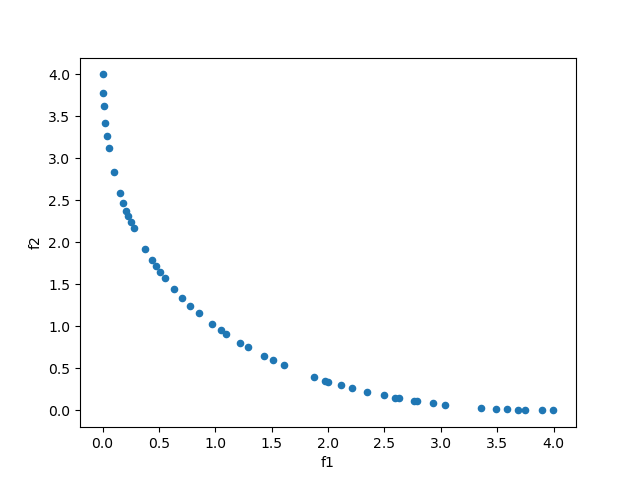

<AxesSubplot:xlabel='f1', ylabel='f2'>

In [12]:
df.plot(x='f1',y='f2', kind='scatter')
